**Import the important packages /libraries :**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/usedcartrain-data.csv")

In [3]:
df.shape

(6019, 14)

In [4]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.shape

(6019, 13)

**Cleaning Data**

Checking for null values:

In [7]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

There are some null values in different comlums, which we need to clear.

In [8]:
df.Seats.mode()

0    5.0
dtype: float64

In [9]:
df.Seats.fillna(value = 0.5, inplace= True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


Mileage, Engine, and Power column also have null values but to remove them first we need to convert the datatype of these columns from object to numeric

In [13]:
#removing kmpl and km/kg from mileage column
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))

#removing CC from engine column
df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))

#removing bhp from power column
df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))

Now it's time to Convert the three columns to numeric type

In [14]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [15]:
print(df['Mileage'].mode())
print(df['Engine'].mode())
print(df['Power'].mode())

0    17.0
dtype: float64
0    1197.0
dtype: float64
0    74.0
dtype: float64


In [16]:
df.Mileage.fillna(value = 17.0 , inplace= True)
df.Engine.fillna(value = 1197.0, inplace= True)
df.Power.fillna(value = 74.0, inplace= True)

In [17]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

Now we are left with null value only in New_Price column 

But since the New_Price column has so many null values will not use this column for prediction

**Feature engineering:**

Checking for unique values in the ‘Name’ column:

In [18]:
df.Name.nunique()

1876

The ‘Name’ column has so many values so we will separate the brand names from the column and create a new column ‘Brand_Name’.

In [19]:
df['Brand_Name'] = df['Name'].str.split(' ').str[0]
df.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Brand_Name,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,0,1
Audi,69,11,12,180,2,1,3,38,11,29,5,19,166
BMW,87,11,14,190,2,1,3,46,9,26,5,30,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,0,1
Chevrolet,43,11,15,107,2,2,3,25,11,25,6,0,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,6,12
Fiat,20,9,11,26,2,1,3,12,5,13,2,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,0,2
Ford,114,11,17,237,2,2,4,40,16,33,4,21,178


In [20]:
df.Brand_Name.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

‘Brand_Name’ column has 2 rows(Isuzu and ISUZU) with the same name but different cases i.e. one in upper and one in lower.

In [21]:
#merging Isuzu and ISUZU
df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Creating a new data frame that we will use for analysis

In [23]:
#dropping the Name ,Location and new_price column
df1_map=df.drop(["Name","Location","New_Price"],axis='columns')

In [24]:
df1_map

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Mahindra
6017,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Maruti


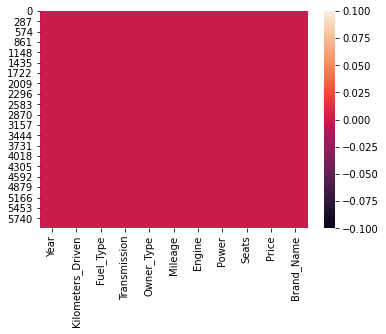

In [25]:
sns.heatmap(df1_map.isnull())
plt.show()

No null value in the data frame , it is ready for analysis

**Data Analysis:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


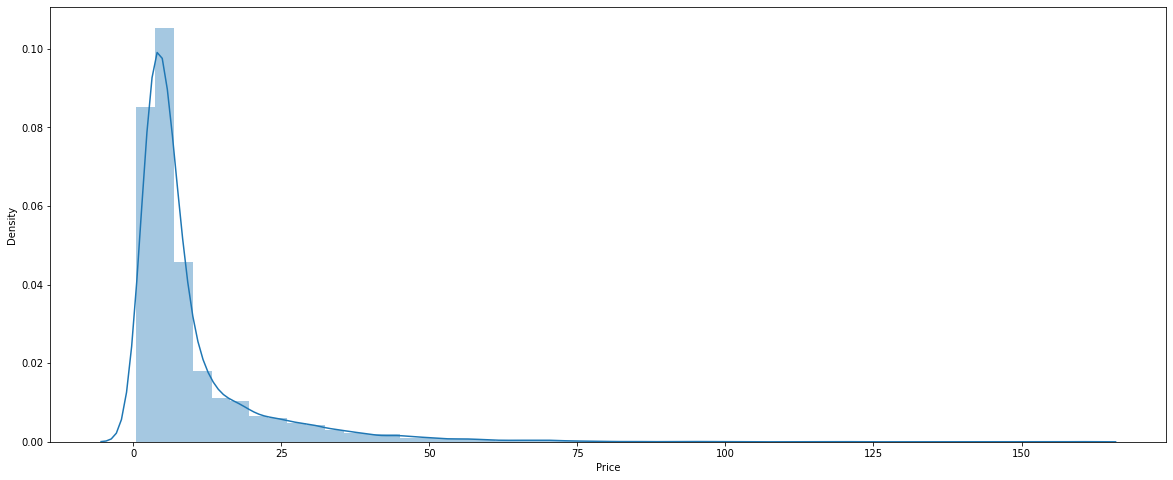

In [26]:
plt.figure(figsize=(20,8))
sns.distplot(df1_map.Price)

**Analysis with respect to the number of cars:**

Brand_Name vs Car count


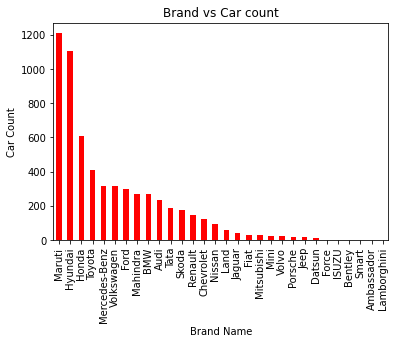

In [29]:
plt.xlabel('Brand Name')
plt.ylabel('Car Count')
df1_map.Brand_Name.value_counts().plot(kind = 'bar', title = 'Brand vs Car count', color = 'red')

People buy Maruti and Hyundai cars more than other brands.

**Year vs Car Count:**

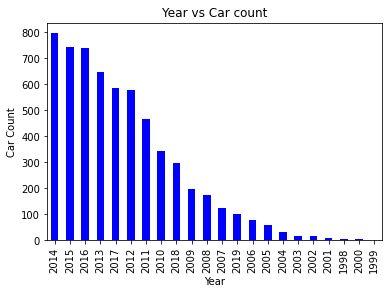

In [30]:
plt.xlabel('Year')
plt.ylabel('Car Count')
df1_map.Year.value_counts().plot(kind = 'bar', title = 'Year vs Car count', color = 'blue')

Maximum no of cars in the data frame is between 2010 to 2017

**Analysis of other features with respect to car count.**

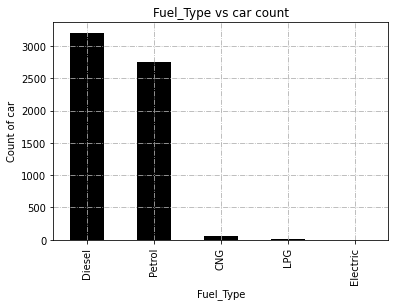

In [31]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
df1_map['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')
plt.grid(linestyle='-.')

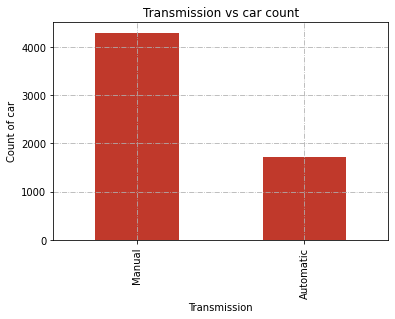

In [33]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
df1_map['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(linestyle='-.')

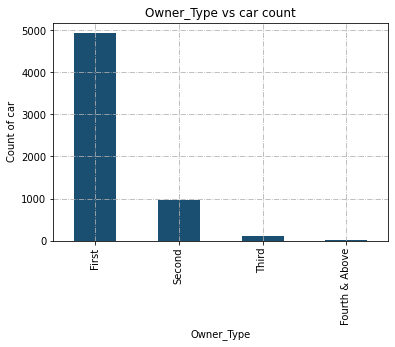

In [34]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
df1_map['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.grid(linestyle='-.')

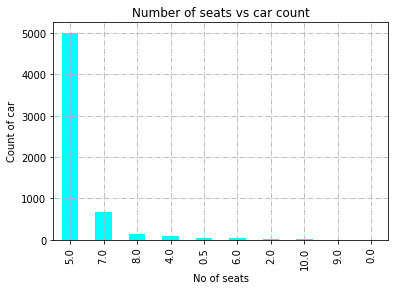

In [35]:
#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
df1_map['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(linestyle='-.')

Conclusion of the above features :
Maximum cars are of petrol and diesel type.
Manual cars are more than Automatic cars.
First-hand cars are maximum followed by second.
Cars with 5 seats are dominant

**Analysis with respect to Price:**

Brand_Name vs Price:

<function matplotlib.pyplot.show>

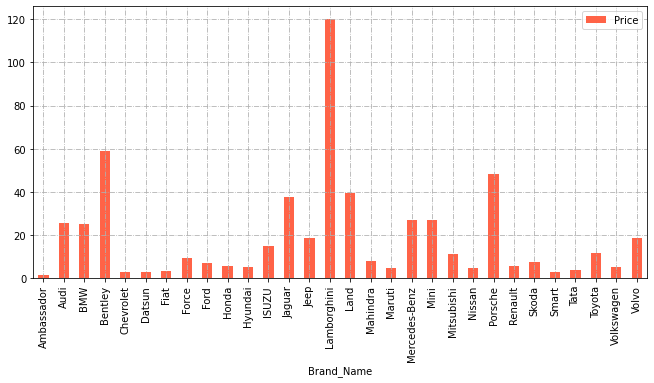

In [36]:
BrandVsPrice = pd.DataFrame(df1_map.groupby('Brand_Name')['Price'].mean())
BrandVsPrice.plot.bar(color = 'tomato', figsize =(11,5))
plt.grid(linestyle = '-.')
plt.show

Lamborghini is the most expensive car in the data frame.

**Analysis of other features with respect to Price:**

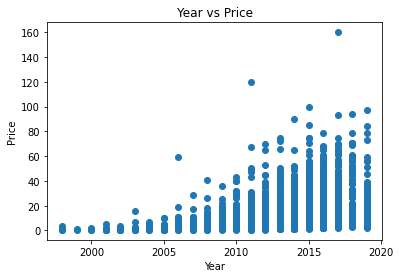

In [37]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(df1_map.Year,df1_map.Price)

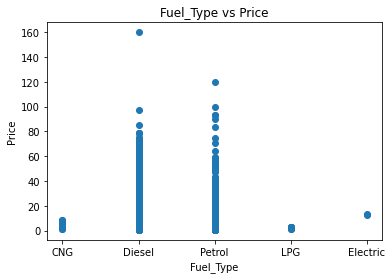

In [38]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(df1_map.Fuel_Type,df1_map.Price)

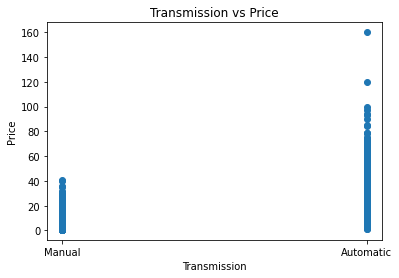

In [39]:
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(df1_map.Transmission,df1_map.Price)

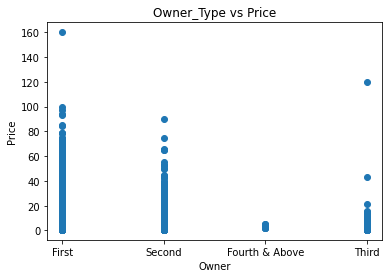

In [40]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(df1_map.Owner_Type,df1_map.Price)

Conclusion of the above features :
Cars ranging between the years 2012 to 2020 cost more.
Petrol and diesel cars are costly.
Automatic cars cost more than manual cars.
First-hand cars are costly followed by second-hand.

**Engine and Power vs Price:**

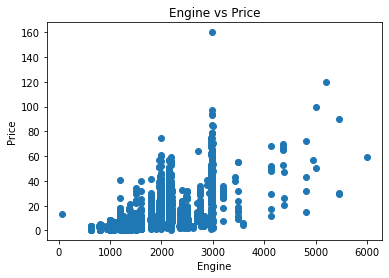

In [41]:
#Engine vs price
plt.title("Engine vs Price")
plt.xlabel("Engine")
plt.ylabel("Price")
plt.scatter(df1_map.Engine,df1_map.Price)

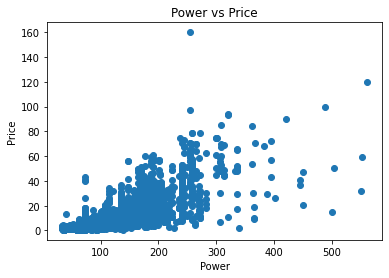

In [42]:
#Power vs price
plt.title("Power vs Price")
plt.xlabel("Power")
plt.ylabel("Price")
plt.scatter(df1_map.Power,df1_map.Price)

**Removing outlier:**

The relation between price and km drove:

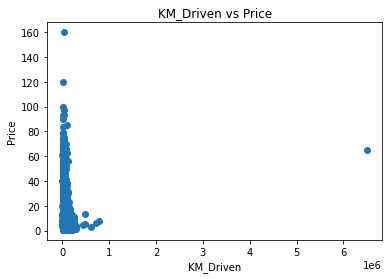

In [43]:
#Kilometers_Driven vs price
plt.title("KM_Driven vs Price")
plt.xlabel("KM_Driven")
plt.ylabel("Price")
plt.scatter(df1_map.Kilometers_Driven,df1_map.Price)

one of the cars has km drove more than 6500000, this is an outlier and we need to remove it

In [44]:
#removing outlier
df1_map.drop(df1_map[df1_map['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

**The relation of Mileage and Seats with Price:**

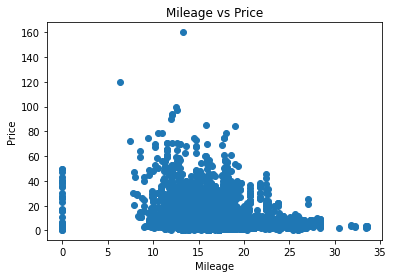

In [45]:
#mileage vs price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(df1_map.Mileage,df1_map.Price)

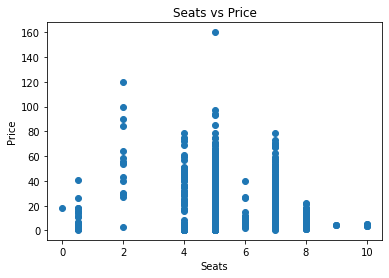

In [46]:
#Seats vs price
plt.title("Seats vs Price")
plt.xlabel("Seats")
plt.ylabel("Price")
plt.scatter(df1_map.Seats,df1_map.Price)

Some rows have zero values in mileage and seats columns.

Counting no of rows with zero values in Mileage and Seats column :

In [47]:
df1_map.isin([0]).sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
Price                 0
Brand_Name            0
dtype: int64

Dropping 1 row from Seats column with zero value:

In [48]:
df1_map.drop(df1_map[df1_map['Seats']==0].index,axis=0,inplace=True)

Cannot drop rows with zero value in the mileage column otherwise, we will lose 68 rows, which will result in the loss of large data. Hence replacing the zero values with mode value:

In [49]:
#we have already calculated the mode of milage column for filling #null values which is 17.0
df1_map["Mileage"].replace({0.0:17.0 },inplace=True)

In [50]:
df1_map.isin([0]).sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

So, the resultant data frame has no zero values

**Handling categorical**

In [51]:
#creating a new dataframe 
df2_n = df1_map.copy()

Fuel_Type ,Transmission,Owner_type,and Brand_Name are categorical columns

In [52]:
from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
df2_n['Fuel_Type_n']= le_Fuel_Type.fit_transform(df2_n['Fuel_Type'])
df2_n['Transmission_n']=le_Transmission.fit_transform(df2_n['Transmission'])
df2_n['Owner_Type_n']=le_Owner_Type.fit_transform(df2_n['Owner_Type'])
df2_n['Brand_Name_n']=le_Brand_Name.fit_transform(df2_n['Brand_Name'])

In [53]:
df2_n

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0,1,0,17
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,1,0,10
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,4,1,0,9


**Dropping columns with data type object:**

In [54]:
df2_n=df2_n.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')

In [55]:
df2_n

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,1,0,17
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,1,0,10
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,4,1,0,9
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,1,0,17
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,1,1,0,17
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,1,1,0,10
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,1,1,2,16
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,4,1,0,17


**Shuffling the columns as per our need**

In [56]:
df2_n=df2_n[['Brand_Name_n','Year','Kilometers_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]


In [57]:
df2_n

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats,Price
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,17,2014,27365,1,1,0,28.40,1248.0,74.00,5.0,4.75
6015,10,2015,100000,1,1,0,24.40,1120.0,71.00,5.0,4.00
6016,16,2012,55000,1,1,2,14.00,2498.0,112.00,8.0,2.90
6017,17,2013,46000,4,1,0,18.90,998.0,67.10,5.0,2.65


**Correlation Matrix**

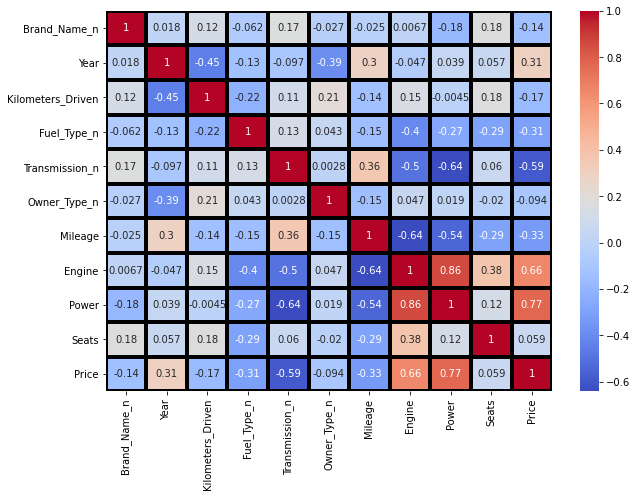

In [58]:
corrMatrix = df2_n.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

In [59]:
df3_inputs = df2_n.drop(['Price'], axis= 'columns')
df3_target = df2_n['Price']

In [60]:
df3_inputs

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,17,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
6015,10,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
6016,16,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
6017,17,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [61]:
df3_target

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6017, dtype: float64

‘df3_inputs’ data frame has input features and ‘df3_target’ data frame has the target value that we need to predict i.e price.

Now let us see which features are the most and least important for predicting the price of a used car:

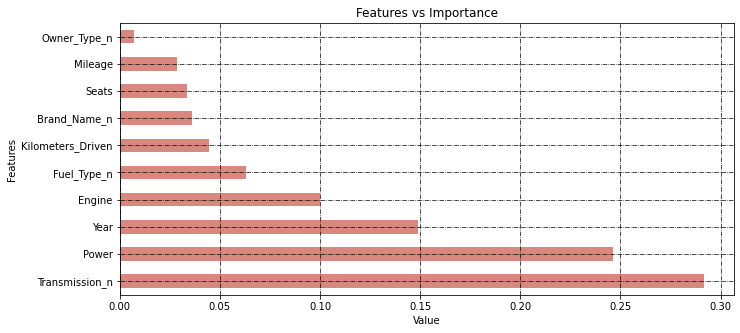

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df3_inputs,df3_target)
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df3_inputs.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
plt.grid(feat_importances.nlargest(10).plot(kind='barh',color='#D98880'))
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

Transmission_n and Owner_Type_n are the most and least important features for predicting the price of a used car.

**Applying different models on the data :**

Importing libraries for training and testing of different models

In [67]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Using Grid Search**

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
def find_best_model_using_gridsearchcv(df3_inputs,df3_target):
  algos = {'linear_regression' : {'model': linear_model.LinearRegression(),
                                  'params': {'normalize': [True, False]}},
           'lasso': {'model': Lasso(),
                     'params': {'alpha': [1,2],'selection': ['random', 'cyclic']}},
           'decision_tree': {'model': DecisionTreeRegressor(),
                             'params': {'criterion' : ['mse','friedman_mse'],'splitter': ['best','random']}},
           'Random_forest': {'model': RandomForestRegressor(),
                             'params': {'max_features': ['auto', 'sqrt'],'n_estimators': [50,60]}}}
    
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(df3_inputs,df3_target)
    scores.append({'model': algo_name,
                   'best_score': gs.best_score_,
                   'best_params': gs.best_params_})
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])
result=find_best_model_using_gridsearchcv(df3_inputs,df3_target)
result

,model,best_score,best_params
0,linear_regression,0.677789,{'normalize': True}
1,lasso,0.661943,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.806301,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,Random_forest,0.872596,"{'max_features': 'sqrt', 'n_estimators': 50}"


Random Forest gives the best score with 87 % accuracy.

**Let us see this graphically:**

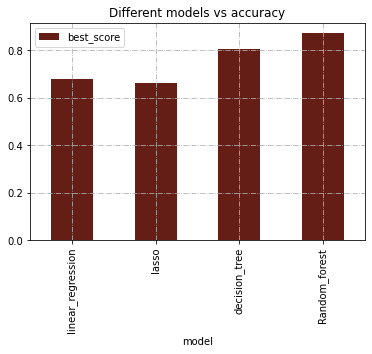

In [75]:
result_map=result.drop(['best_params'],axis='columns')
result_map.plot(x="model",y='best_score',kind='bar',color='#641E16',title='Different models vs accuracy')
plt.grid(linestyle='-.')

**Splitting the data frame for training it on the random forest model :**

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3_inputs, df3_target, test_size = 0.4, random_state = 10)

In [77]:
len(x_train)

3610

In [78]:
len(x_test)

2407

As Random Forest is giving us the best accuracy. So, we will use this model with the best parameters

In [79]:
Model_Randomforest = RandomForestRegressor(max_features= 'sqrt',bootstrap= True)

In [80]:
Model_Randomforest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
Model_Randomforest.score(x_test, y_test)

0.9022012220030866

**Importing the model in a file :**

In [83]:
#pickle method
import pickle

In [85]:
#Writing the model in a file
pickle.dump(Model_Randomforest, open('rmodel.pkl', 'wb'))

In [86]:
#Reading the file
rmodel = pickle.load(open('rmodel.pkl', 'rb'))

**Testing the model:**

In [87]:
df3_inputs.columns

Index(['Brand_Name_n', 'Year', 'Kilometers_Driven', 'Fuel_Type_n',
       'Transmission_n', 'Owner_Type_n', 'Mileage', 'Engine', 'Power',
       'Seats'],
      dtype='object')

In [88]:
df3_inputs

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...
6014,17,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
6015,10,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
6016,16,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
6017,17,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [90]:
rmodel.predict([[10, 2015, 100000, 3, 1, 2, 50.0, 1500.0, 75, 5]])

array([4.2245])

The car cost 4.2 lakhs